In [1]:
import importlib
import Parallel_pair_correlation_HDF5
importlib.reload(Parallel_pair_correlation_HDF5)
from Parallel_pair_correlation_HDF5 import *

import matplotlib.pyplot as plt
import sys

sys.path.append('/home/hcleroy/PostDoc/aging_condensates/Simulation/Gillespie/Analysis/')
sys.path.append('/home/hugo/PostDoc/aging_condensates/Gillespie/Analysis/')
from ToolBox import *

sys.path.append('/home/hcleroy/PostDoc/aging_condensates/Simulation/Gillespie/Gillespie_backend')
import Gillespie_backend as Gil

sys.path.append('/home/hcleroy/Extra_Module_py')
sys.path.append('/home/hugo/Extra_Module_py')
import formated_matplotlib

Ec = lambda L,N : 3/2*np.log(L/N* np.pi/3)

In [2]:
# gillespie parameter
Nlinker = 20
ell_tot = 10**3
V = 2*((ell_tot/6)**1.5/Nlinker**0.5*3/4*np.pi)
kdiff = 100/(V) # for 3D
Energy = -15
Nprocess = 100
args = [[ell_tot,Energy,kdiff,np.random.randint(1000000),Nlinker,3] for _ in range(Nprocess)]
print(Ec(ell_tot,Nlinker))
# Simulation parameters
step_tot = 100000
compute_steps = 10000

5.937210903914155


In [3]:
Parallel_correlation_function(args,step_tot,compute_steps,"20_linker_Ell_10E3.hdf",30,np.sqrt(ell_tot))

In [4]:
file = pt.open_file('20_linker_Ell_10E3.hdf','r')

In [5]:
pcfs = np.zeros((10,30,2))
n= 0.
for group in file.walk_nodes('/',classname='Group'):
    n+=1
    for i,array in enumerate(file.list_nodes(group._v_pathname,classname='Array')):
        pcfs[i] += array.read()
pcfs /= n
#array = file.get_node('/bin_hist_0x10c66/')

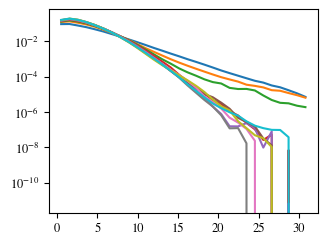

In [8]:
for xy in pcfs:
    plt.plot(xy[:,0],xy[:,1])

plt.yscale('log')

In [59]:
file.close()